In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json
import pandas as pd
from cycler import cycler
from graphviz import Source
import graphviz
import pylab

In [ ]:
with open('cars_data.json', 'r') as f:
    cars = json.load(f)
df = pd.DataFrame(cars)

KM_PER_LITER_PER_MILES_PER_GALLON = 0.425144

df['kpl'] = df['Miles_per_Gallon'] * KM_PER_LITER_PER_MILES_PER_GALLON
df['weight'] = df['Weight_in_lbs'] * 0.453592
df = df[~np.isnan(df['kpl']) & ~np.isnan(df['Horsepower'])]


In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(df['Horsepower'], df['kpl'], marker='o', linestyle='', markersize=10, color='orange', markeredgecolor='black')
ax.tick_params(axis='x', labelsize=28)
ax.tick_params(axis='y', labelsize=28)
ax.set_ylabel('Kilometers per Liter', fontsize=32, fontweight='bold')
ax.set_xlabel('Horsepower', fontsize=32, fontweight='bold')
ax.grid('both')
ax.set_ylim([0, 21])
ax.set_xlim([0, 250])
plt.savefig('../tmp/cars_data.png', bbox_inches='tight')

In [ ]:
hp = np.linspace(0, 250)
lines = [
    18 - 0.05*hp,
    20 - 0.09*hp,
    10 + 0.0000*hp
]
labels = [
    (r'$\beta_0 = 18, \beta_1=-0.05$'),
    (r'$\beta_0 = 20, \beta_1=-0.09$'),
    (r'$\beta_0 = 10, \beta_1=0$'),
]
colors = [
    ''
]


plt.rcParams['axes.prop_cycle'] = cycler(color=plt.cm.Set1.colors)
for n_lines in [1,2,3]:
    f, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.plot(df['Horsepower'], df['kpl'], marker='o', linestyle='', markersize=10, color='orange', markeredgecolor='black')
    for line, label in zip(lines[:n_lines], labels[:n_lines]):
        ax.plot(hp, line, linewidth=5, linestyle='--', label=label)
    ax.legend(fontsize=24, frameon=False)
    ax.tick_params(axis='x', labelsize=28)
    ax.tick_params(axis='y', labelsize=28)
    ax.set_ylabel('Kilometers per Liter', fontsize=32, fontweight='bold')
    ax.set_xlabel('Horsepower', fontsize=32, fontweight='bold')
    ax.grid('both')
    ax.set_ylim([0, 21])
    ax.set_xlim([0, 250])
    plt.savefig('../tmp/cars_data_lines%d.png' % n_lines, bbox_inches='tight')

In [ ]:
hp = np.array(df['Horsepower'])
kpl = np.array(df['kpl'])
beta0s = np.linspace(0, 50, 100)
beta1s = -np.linspace(0, 1, 100)

best_betas = None
best_loss = np.float("inf")
for b0 in beta0s:
    for b1 in beta1s:
        line = b0 + b1 * hp
        mse = np.mean(np.square(line - kpl))
        if mse < best_loss:
            best_loss = mse
            best_betas = (b0, b1)


b0, b1 = best_betas
print(best_loss)
print(best_betas)

f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(df['Horsepower'], df['kpl'], marker='o', linestyle='', markersize=10, color='orange', markeredgecolor='black')

hp = np.linspace(0, 250, 1000)
ax.plot(hp, b0+b1*hp, linewidth=5, linestyle='--', label=r'$\beta_0 = %0.2f, \beta_1=%0.2f$' % (b0,b1))
ax.tick_params(axis='x', labelsize=28)
ax.tick_params(axis='y', labelsize=28)
ax.set_ylabel('Kilometers per Liter', fontsize=32, fontweight='bold')
ax.set_xlabel('Horsepower', fontsize=32, fontweight='bold')
ax.grid('both')
ax.set_ylim([0, 21])
ax.set_xlim([0, 250])
ax.legend(fontsize=24, frameon=False)
plt.savefig('../tmp/best_fit.png', bbox_inches='tight')

In [ ]:
hp = np.array(df['Horsepower'])
kpl = np.array(df['kpl'])
beta0s = np.linspace(-4, 4, 100)
beta1s = -np.linspace(-0.2, 0.2, 100)

best_betas = None
best_loss = np.float("inf")
for b0 in beta0s:
    for b1 in beta1s:
        line = np.exp(b0 + b1 * hp)
        mse = np.mean(np.square(line - kpl))
        if mse < best_loss:
            best_loss = mse
            best_betas = (b0, b1)


b0, b1 = best_betas
print(best_loss)
print(best_betas)

f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(df['Horsepower'], df['kpl'], marker='o', linestyle='', markersize=10, color='orange', markeredgecolor='black')

hp = np.linspace(0, 250, 1000)
ax.plot(hp, np.exp(b0+b1*hp), linewidth=5, linestyle='--', label=r'$\beta_0 = %0.2f, \beta_1=%0.2f$' % (b0,b1))
ax.tick_params(axis='x', labelsize=28)
ax.tick_params(axis='y', labelsize=28)
ax.set_ylabel('Kilometers per Liter', fontsize=32, fontweight='bold')
ax.set_xlabel('Horsepower', fontsize=32, fontweight='bold')
ax.grid('both')
ax.set_ylim([0, 21])
ax.set_xlim([0, 250])
ax.legend(fontsize=24, frameon=False)

plt.savefig('../tmp/best_fit_exponential.png', bbox_inches='tight')

In [ ]:
single_neuron_graph = """
digraph G {
    graph [dpi=300];
        rankdir=LR
        splines=line
        nodesep=.15;
        
        node [label="", width=0.5, fixedsize=true, penwidth=2];
        
    subgraph cluster_0 {
		color=white;
        node [style=solid,color=blue4, shape=circle];
		x1 x2;
		label = "Input Layer";
	}

	subgraph cluster_1 {
		color=white;
		node [style=solid,color=seagreen2, shape=circle];
		y;
		label="Output Layer";
	}
    
        x1 [label=1]
        x2 [label=HP]
        y [label=KPL]
        
        x1 -> y [label=<&#946;<sub>0</sub>>];

        x2 -> y [label=<&#946;<sub>1</sub>>];
        

}
"""
dot = Source(single_neuron_graph)
dot.render(filename='../tmp/single_neuron', format='png')

graph = """
digraph G {
        graph [dpi=300];
        rankdir=LR
	splines=line
        nodesep=.05;
        
        node [label="", width=0.5, fixedsize=true, penwidth=2];
        
        subgraph cluster_0 {
		color=white;
                node [style=solid,color=blue4, shape=circle];
		x1 x2;
		label = "Input Layer";
	}

	subgraph cluster_1 {
		color=white;
		node [style=solid,color=red2, shape=circle];
		a12 a22 a32 a42;
		label = "Hidden Layer";
	}

	subgraph cluster_2 {
		color=white;
		node [style=solid,color=seagreen2, shape=circle];
		y;
		label="Output Layer";
	}
    
        x1 [label=1]
        x2 [label=HP]
        a12 [label=1]
        a22 [label=<h<sub>1</sub>>]
        a32 [label=<h<sub>2</sub>>]
        a42 [label=<h<sub>3</sub>>]
        y [label=KPL]
        
        x1 -> a22;
        x1 -> a32;
        x1 -> a42;


        x2 -> a22;
        x2 -> a32;
        x2 -> a42;

 
        a12 -> y
        a22 -> y
        a32 -> y
        a42 -> y
    


}
"""
dot = Source(graph)
dot.render(filename='../tmp/network', format='png')



In [ ]:
activations = [
    ('Linear Activation', lambda xs: xs),
    ('Exponential Activation', lambda xs: np.exp(xs)),
    ('Hyperbolic Tangent Activation', lambda xs: np.tanh(xs))
]


xs = np.linspace(-3, 3, 1000)

for title, f in activations:
    ys = f(xs)
    f, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.plot(xs, ys, linewidth=10)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.tick_params(axis='x', labelsize=28)
    ax.tick_params(axis='y', labelsize=28)
    ax.set_title(title, fontsize=32, fontweight='bold')
    ax.grid(True)
    plt.savefig('../tmp/activations_%s.png' % (title), bbox_inches='tight')

In [ ]:
# loss function intution

xs = np.linspace(-10, 10, 1000)
f = lambda xs: np.square(xs)
df = lambda xs: 2 * xs 
lr = 0.1

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(xs,f(xs), linewidth=10, color='blue')

steps = [
    -7.5
]

dloss = float("inf")

while np.abs(dloss) > 1e-6:
    dloss = df(steps[-1])
    next_step = steps[-1] - dloss * lr
    steps.append(next_step)

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', length=0)
ax.set_xlabel(r'Free Parameter $\beta$', fontsize=32, fontweight='bold')
ax.set_ylabel(r'Mean Squared Error (MSE)', fontsize=32, fontweight='bold')
plt.savefig('../tmp/loss_demo_base.png', bbox_inches='tight')


ax.plot(steps[:1], f(steps[:1]), color='orange', linewidth=10, marker='o', markersize=20)
plt.savefig('../tmp/loss_demo_1.png', bbox_inches='tight')

ax.plot(steps[:2], f(steps[:2]), color='orange', linewidth=10, marker='o', markersize=20)
plt.savefig('../tmp/loss_demo_2.png', bbox_inches='tight')

ax.plot(steps[:3], f(steps[:3]), color='orange', linewidth=10, marker='o', markersize=20)
plt.savefig('../tmp/loss_demo_3.png', bbox_inches='tight')

ax.plot(steps, f(steps), color='orange', linewidth=10, marker='o', markersize=20)
plt.savefig('../tmp/loss_demo_4.png', bbox_inches='tight')



In [ ]:
# loss function intution

xs = np.linspace(-10, 10, 1000)
f = lambda xs: np.sin(xs) + np.cos(0.5*xs)
df = lambda xs: np.cos(xs) - 0.5*np.sin(0.5*xs)
lr = 0.1

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(xs,f(xs), linewidth=10, color='blue')

steps = [
    0.4
]

dloss = float("inf")

while np.abs(dloss) > 1e-6:
    dloss = df(steps[-1])
    next_step = steps[-1] - dloss * lr
    steps.append(next_step)

steps = np.array(steps)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', length=0)
ax.set_xlabel(r'Free Parameter $\beta$', fontsize=32, fontweight='bold')
ax.set_ylabel(r'Mean Squared Error (MSE)', fontsize=32, fontweight='bold')
plt.savefig('../tmp/loss_demo_complex.png', bbox_inches='tight')

ax.plot(steps, f(steps), color='purple', linewidth=10, marker='o', markersize=20)


steps = [
    -10.0
]

dloss = float("inf")

while np.abs(dloss) > 1e-6:
    dloss = df(steps[-1])
    next_step = steps[-1] - dloss * lr
    steps.append(next_step)
steps = np.array(steps)
ax.plot(steps, f(steps), color='orange', linewidth=10, marker='o', markersize=20)
plt.savefig('../tmp/loss_demo_complex_examples.png', bbox_inches='tight')


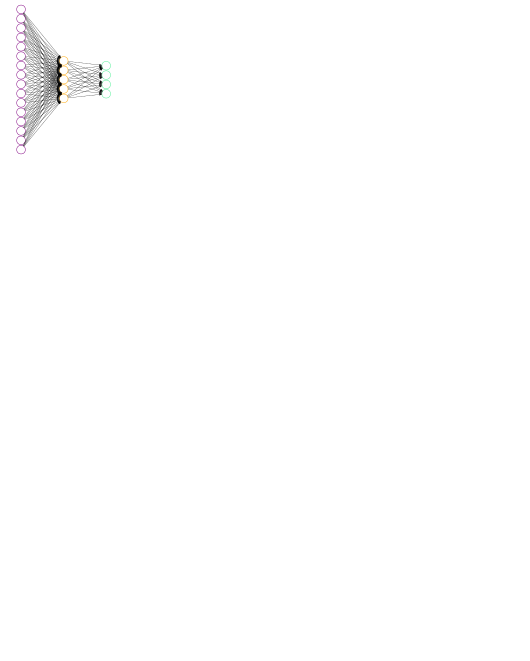

In [45]:
n_inputs = 16
n_hidden = 5
n_output = 4

# print(" ".join(['x%d' % i for i in range(n_inputs)]))
# print(" ".join(['h%d' % i for i in range(n_hidden)]))

# for i in range(n_inputs):
#     for j in range(n_hidden):
#         print("x%d -> h%d" % (i, j))

# print(" ".join(['o%d' % i for i in range(n_output)]))

# for i in range(n_hidden):
#     for j in range(n_output):
#         print("h%d -> o%d" % (i, j))
        
graph = """
digraph G {
            graph [dpi=300];
        rankdir=LR
	splines=line
        nodesep=.04;
        ratio=1.25;

        node [label="", width=0.5, fixedsize=true, penwidth=2];
        
        subgraph cluster_0 {
            color=white;
            node [style=solid,color=purple, shape=circle];
            x0 x1 x2 x3 x4 x5 x6 x7 x8 x9 x10 x11 x12 x13 x14 x15;


	}

	subgraph cluster_1 {
		color=white;
		node [style=solid,color=orange, shape=circle];
        h0 h1 h2 h3 h4;

	}

	subgraph cluster_2 {
		color=white;
		node [style=solid,color=seagreen2, shape=circle];
		        o0 o1 o2 o3;

	}
    
        x0 -> h0
        x0 -> h1
        x0 -> h2
        x0 -> h3
        x0 -> h4
        x1 -> h0
        x1 -> h1
        x1 -> h2
        x1 -> h3
        x1 -> h4
        x2 -> h0
        x2 -> h1
        x2 -> h2
        x2 -> h3
        x2 -> h4
        x3 -> h0
        x3 -> h1
        x3 -> h2
        x3 -> h3
        x3 -> h4
        x4 -> h0
        x4 -> h1
        x4 -> h2
        x4 -> h3
        x4 -> h4
        x5 -> h0
        x5 -> h1
        x5 -> h2
        x5 -> h3
        x5 -> h4
        x6 -> h0
        x6 -> h1
        x6 -> h2
        x6 -> h3
        x6 -> h4
        x7 -> h0
        x7 -> h1
        x7 -> h2
        x7 -> h3
        x7 -> h4
        x8 -> h0
        x8 -> h1
        x8 -> h2
        x8 -> h3
        x8 -> h4
        x9 -> h0
        x9 -> h1
        x9 -> h2
        x9 -> h3
        x9 -> h4
        x10 -> h0
        x10 -> h1
        x10 -> h2
        x10 -> h3
        x10 -> h4
        x11 -> h0
        x11 -> h1
        x11 -> h2
        x11 -> h3
        x11 -> h4
        x12 -> h0
        x12 -> h1
        x12 -> h2
        x12 -> h3
        x12 -> h4
        x13 -> h0
        x13 -> h1
        x13 -> h2
        x13 -> h3
        x13 -> h4
        x14 -> h0
        x14 -> h1
        x14 -> h2
        x14 -> h3
        x14 -> h4
        x15 -> h0
        x15 -> h1
        x15 -> h2
        x15 -> h3
        x15 -> h4

        h0 -> o0
        h0 -> o1
        h0 -> o2
        h0 -> o3
        h1 -> o0
        h1 -> o1
        h1 -> o2
        h1 -> o3
        h2 -> o0
        h2 -> o1
        h2 -> o2
        h2 -> o3
        h3 -> o0
        h3 -> o1
        h3 -> o2
        h3 -> o3
        h4 -> o0
        h4 -> o1
        h4 -> o2
        h4 -> o3


}
"""
dot = Source(graph)
dot.render(filename='../tmp/shapenet', format='png')
dot
